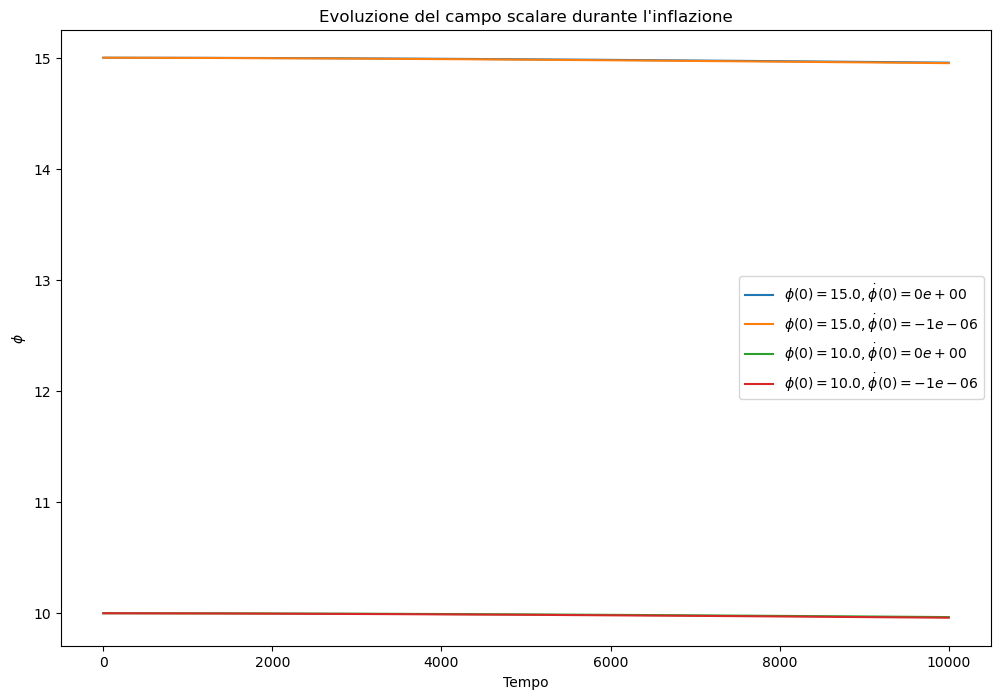

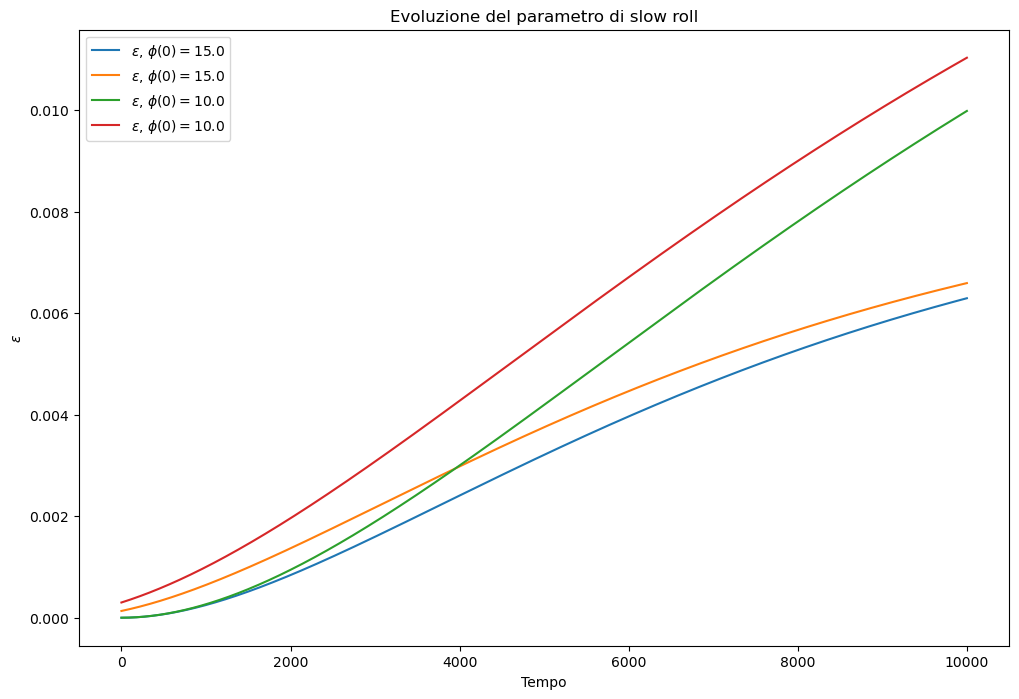

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parametro del potenziale (scegli un valore piccolo per un'adeguata inflazione)
m = 1e-5  # ad es. in unità ridotte

# Definiamo il sistema di equazioni
def inflation_system(t, y):
    phi, phi_dot = y
    # Calcola il potenziale e la sua energia cinetica
    V = 0.5 * m**2 * phi**2
    kinetic = 0.5 * phi_dot**2
    # Equazione di Friedmann: H^2 = (1/3)(kinetic + V)
    H = np.sqrt((kinetic + V) / 3.0)
    
    dphi_dt = phi_dot
    # Equazione del campo: φ¨ + 3Hφ˙ + m²φ = 0
    dphi_dot_dt = -3 * H * phi_dot - m**2 * phi
    return [dphi_dt, dphi_dot_dt]

# Definisci gli intervalli temporali (ad esempio, in "unità di tempo" appropriate)
t_span = (0, 10000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Varia le condizioni iniziali (ad es. phi0 elevato e phi_dot0 piccolo per il regime slow roll)
initial_conditions = [
    [15.0, 0.0],
    [15.0, -1e-6],
    [10.0, 0.0],
    [10.0, -1e-6]
]

plt.figure(figsize=(12, 8))
for ic in initial_conditions:
    sol = solve_ivp(inflation_system, t_span, ic, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    plt.plot(sol.t, sol.y[0], label=rf"$\phi(0)={ic[0]}, \dot{{\phi}}(0)={ic[1]:.0e}$")

plt.xlabel("Tempo")
plt.ylabel(r"$\phi$")
plt.title("Evoluzione del campo scalare durante l'inflazione")
plt.legend()
plt.show()

# Calcolo dei parametri di slow roll (esempio: epsilon = (1/2)(phi_dot/H)^2)
def compute_H(phi, phi_dot):
    V = 0.5 * m**2 * phi**2
    kinetic = 0.5 * phi_dot**2
    return np.sqrt((kinetic + V) / 3.0)

plt.figure(figsize=(12, 8))
for ic in initial_conditions:
    sol = solve_ivp(inflation_system, t_span, ic, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    phi = sol.y[0]
    phi_dot = sol.y[1]
    H_vals = compute_H(phi, phi_dot)
    epsilon = 0.5 * (phi_dot / H_vals)**2  # in unità M_P=1
    plt.plot(sol.t, epsilon, label=rf"$\epsilon$, $\phi(0)={ic[0]}$")
plt.xlabel("Tempo")
plt.ylabel(r"$\epsilon$")
plt.title("Evoluzione del parametro di slow roll")
plt.legend()
plt.show()



<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_32085/3072175161.py:17: SyntaxWarning: invalid escape sequence '\e'
  plt.title("Slow roll parameter $\epsilon(t)$")


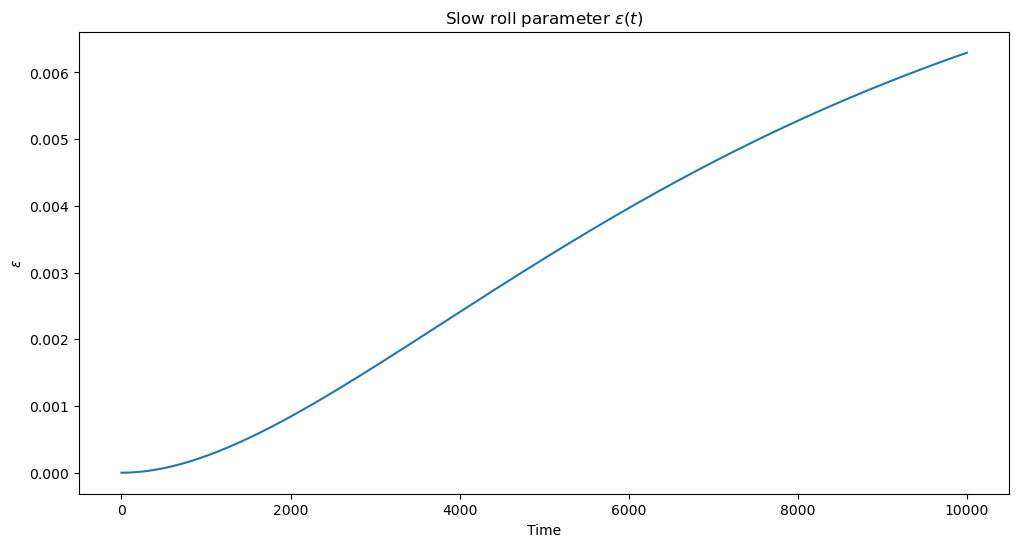

In [5]:
# Calcolo e plot di epsilon(t)
def compute_H(phi, phi_dot):
    V = 0.5 * m**2 * phi**2
    kinetic = 0.5 * phi_dot**2
    return np.sqrt((kinetic + V) / 3.0)

sol = solve_ivp(inflation_system, t_span, [15.0, 0.0], t_eval=t_eval, rtol=1e-8, atol=1e-10)
phi_vals = sol.y[0]
phi_dot_vals = sol.y[1]
H_vals = compute_H(phi_vals, phi_dot_vals)
epsilon_vals = 0.5 * (phi_dot_vals / H_vals)**2

plt.figure(figsize=(12, 6))
plt.plot(sol.t, epsilon_vals)
plt.xlabel("Time")
plt.ylabel(r"$\epsilon$")
plt.title("Slow roll parameter $\epsilon(t)$")
plt.show()
